# Ejemplo de uso con datos de Twitter

## Data preprocessing: getting data into NetworkX

To make a network in NetworkX using external data, the nodes and the connections between them must be represented by pairs of tuples. In this first section, we'll walk through some data preprocessing techniques together to get our data ready for analysis.

Let's take a look at the data we're working with.

In [1]:
import json
f = open('../materials/data/followers/my_followers.json')

data = json.load(f)
pairs = []

for user in data['users']:
    pairs.append(('israchaves', str(user['screen_name'])))

pairs[:10]

[('israchaves', 'DenisAbarca8'),
 ('israchaves', 'Jajimecr'),
 ('israchaves', 'Diegov08L'),
 ('israchaves', 'Mich90cj'),
 ('israchaves', 'franmongeh'),
 ('israchaves', '4_bartels'),
 ('israchaves', 'RalphGarci'),
 ('israchaves', 'emsalazarb'),
 ('israchaves', 'Francini_sd'),
 ('israchaves', 'CaroMatamoross')]

In [ ]:
# Because the relationship data is split across files, we need to
# walk through all of them to get the data.
import os

for (dir_path, dir_names, file_names) in os.walk('../materials/data/followers/'):
    files = file_names
    
for file_name in files:
    with open('../materials/data/followers/' + file_name) as p:
        pair_data = json.load(p)
        for k in pair_data.keys():
            twitter_pair = k.split()
            if pair_data[k]['relationship']['source']['following'] is True:
                pairs.append((str(twitter_pair[0]), str(twitter_pair[1])))
            elif pair_data[k]['relationship']['source']['followed_by'] is True:
                pairs.append((str(twitter_pair[1]), str(twitter_pair[0])))
                
len(pairs)

## Make networks with Twitter data

Using the NetworkX methods we've learned before, let's do some network analysis on user's Twitter friends. We're going to look at the Twitter handles that the user follows, as well as the relationships between those handles.

### Undirected graph

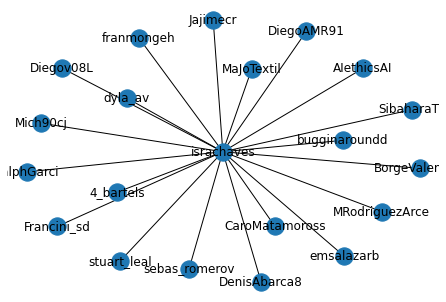

In [6]:
%matplotlib inline
import networkx as nx

# Build an undirected graph.

g=nx.Graph()
g.add_edges_from(pairs)
nx.draw(g, with_labels=True)


In [ ]:
# Just from looking at it, is this network connected or unconnected?
#Connected

In [4]:
# Hint: if you want to sort a dictionary to easily 
# find the highest and lowest values, use this function 
# on the output of the centrality measures like degree_centrality():

import operator

def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(), key=operator.itemgetter(1))

# ex. degree_sorted = centrality_sort(degree_vals)

In [15]:
# Which nodes have the highest/lowest degree centrality?

degree_cent=nx.degree_centrality(g)
degree_sorted=centrality_sort(degree_cent)
degree_sorted[-10:]
#print(degree_cent)

[('dyla_av', 0.05),
 ('SibaharaT2', 0.05),
 ('MaJoTextil', 0.05),
 ('sebas_romerov', 0.05),
 ('MRodriguezArce', 0.05),
 ('stuart_leal', 0.05),
 ('AIethicsAI', 0.05),
 ('BorgeValentina', 0.05),
 ('bugginaroundd', 0.05),
 ('israchaves', 1.0)]

In [16]:
# Which nodes have the highest/lowest betweenness centrality?


betweenness_cent=nx.betweenness_centrality(g)
bet_sorted=centrality_sort(betweenness_cent)
bet_sorted[-10:]

[('dyla_av', 0.0),
 ('SibaharaT2', 0.0),
 ('MaJoTextil', 0.0),
 ('sebas_romerov', 0.0),
 ('MRodriguezArce', 0.0),
 ('stuart_leal', 0.0),
 ('AIethicsAI', 0.0),
 ('BorgeValentina', 0.0),
 ('bugginaroundd', 0.0),
 ('israchaves', 1.0)]

In [17]:
# Which nodes have the highest/lowest closeness centrality?

closeness_cent=nx.closeness_centrality(g)
closeness_sorted=centrality_sort(closeness_cent)
#closeness_sorted[:10]
#TO DO
closeness_sorted[-10:]

[('dyla_av', 0.5128205128205128),
 ('SibaharaT2', 0.5128205128205128),
 ('MaJoTextil', 0.5128205128205128),
 ('sebas_romerov', 0.5128205128205128),
 ('MRodriguezArce', 0.5128205128205128),
 ('stuart_leal', 0.5128205128205128),
 ('AIethicsAI', 0.5128205128205128),
 ('BorgeValentina', 0.5128205128205128),
 ('bugginaroundd', 0.5128205128205128),
 ('israchaves', 1.0)]

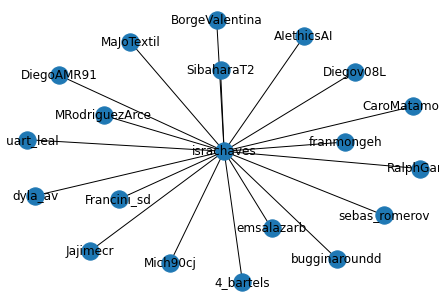

In [9]:
# Let's look at subsections of the graph. We'll do this together.

highest_degree=[node[0] for node in degree_sorted[-20:]]
sub=g.subgraph(highest_degree)
nx.draw(sub, with_labels=True)




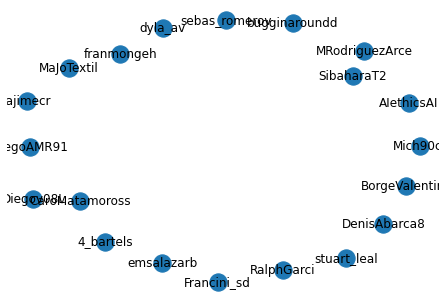

In [10]:
lowest_degree = [node[0] for node in degree_sorted[:20]]
subl = g.subgraph(lowest_degree)
nx.draw(subl, with_labels=True)

### Directed graph

Let's add some direction to the graph. When we processed our data, we ordered the pairs so that the first handle in the pair is a follower of the second handle. We're not worrying about pairs that mutually follow each other right now.

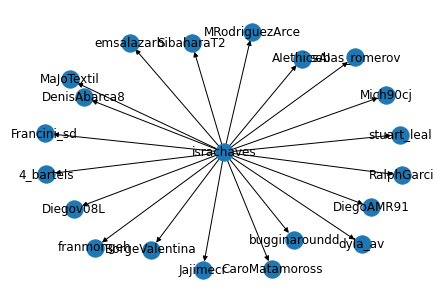

In [11]:
# Build a directed graph.

# Directed graph

d = nx.DiGraph()

d.add_edges_from(pairs)
nx.draw(d, with_labels=True)

In [12]:
# Run some degree centrality measures for directed graphs:
# in_degree_centrality(): number of incoming connections (number of people following you)
# out_degree_centrality(): number of outgoing connections (number of people you follow)


in_degree_centrality = nx.in_degree_centrality(d)
in_degree_sorted = sorted(in_degree_centrality.items(), key=operator.itemgetter(1))
print('-------------Degree Centrality-------------')
print('Highest in degree:', in_degree_sorted[-5:])
print('\n')
print('Lowest in degree:', in_degree_sorted[:5])
print('\n')

out_degree_centrality = nx.out_degree_centrality(d)
out_degree_sorted = sorted(out_degree_centrality.items(), key=operator.itemgetter(1))
print('-------------Degree Centrality-------------')
print('Highest out degree:', out_degree_sorted[-5:])
print('\n')
print('Lowest out degree:', out_degree_sorted[:5])

-------------Degree Centrality-------------
Highest in degree: [('MRodriguezArce', 0.05), ('stuart_leal', 0.05), ('AIethicsAI', 0.05), ('BorgeValentina', 0.05), ('bugginaroundd', 0.05)]


Lowest in degree: [('israchaves', 0.0), ('DenisAbarca8', 0.05), ('Jajimecr', 0.05), ('Diegov08L', 0.05), ('Mich90cj', 0.05)]


-------------Degree Centrality-------------
Highest out degree: [('stuart_leal', 0.0), ('AIethicsAI', 0.0), ('BorgeValentina', 0.0), ('bugginaroundd', 0.0), ('israchaves', 1.0)]


Lowest out degree: [('DenisAbarca8', 0.0), ('Jajimecr', 0.0), ('Diegov08L', 0.0), ('Mich90cj', 0.0), ('franmongeh', 0.0)]


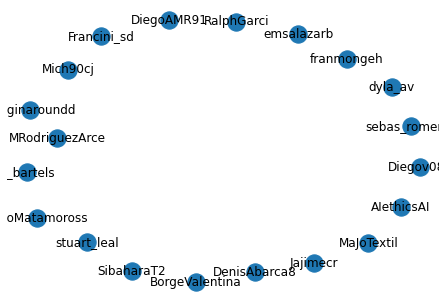

In [13]:
# Let's look at subsections of the graph. Just like we did above.

# Top 20 highest in-degree centrality scores:


highest_in_degree = [node[0] for node in in_degree_sorted[-20:]]
subin = d.subgraph(highest_in_degree)
nx.draw(subin, with_labels=True)

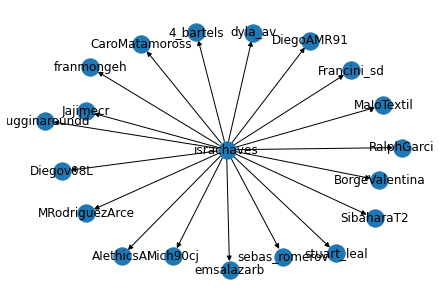

In [14]:
# Top 20 highest out-degree centrality scores:
highest_out_degree = [node[0] for node in out_degree_sorted[-20:]]
subin = d.subgraph(highest_out_degree)
nx.draw(subin, with_labels=True)